### Load and pre-process the dataset

In [1]:
from pathlib import Path
import json
from helper.sentence_destructor import destruct_sentence
import random
from tokenizers import Tokenizer, Encoding
import tqdm
from typing import Sequence
from helper.dataset import SentenceDataset

input_tokenizer: Tokenizer = Tokenizer.from_file(str(Path.cwd().parent / "config/input_tokenizer.json"))
output_tokenizer: Tokenizer = Tokenizer.from_file(str(Path.cwd().parent / "config/output_tokenizer.json"))

print(input_tokenizer.encode("<UNK><EOS><SOS><PAD>hello").ids)
data_dir = Path.cwd().parent / ".data"
dataset_file = data_dir / "text" / "2000.json"
my_dataset = SentenceDataset(dataset_file, input_tokenizer, output_tokenizer, broken_sentence_variation_count=2)


print(f"sentence length (correct)  {len(my_dataset.correct_sentences)}")
print(f"sentence length (broken )  {len(my_dataset.broken_sentences)}")

print(f"max sentence length (correct) {my_dataset.max_correct_sentence_length}")
print(f"max sentence length (broken ) {my_dataset.max_broken_sentence_length}")


[1, 3, 2, 0, 70, 67, 74, 74, 77]


Processing dataset...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22262/22262 [00:19<00:00, 1144.42it/s]

sentence length (correct)  22262
sentence length (broken )  44524
max sentence length (correct) 304
max sentence length (broken ) 1037


### Lets do some sentence length statistics.

In [2]:
import seaborn
from typing import Sequence

def calculate_statistics(items: list[list[int]]) -> dict[int, int]:
    lengths: dict[int, int] = {}

    for s in items:
        length = len(s)
        lengths[length] = lengths[length] + 1 if length in lengths else 1
    return lengths


Text(0.5, 1.0, 'Correct sentence count')

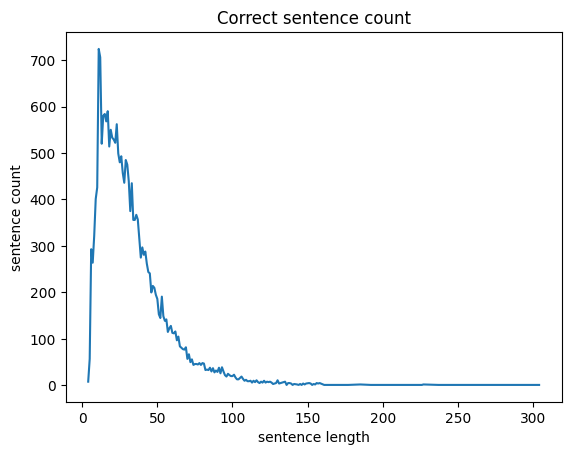

In [3]:
a = seaborn.lineplot(data=calculate_statistics(my_dataset.correct_sentences))
a.set_xlabel("sentence length")
a.set_ylabel("sentence count")
a.set_title("Correct sentence count")

Text(0.5, 1.0, 'Broken sentence count')

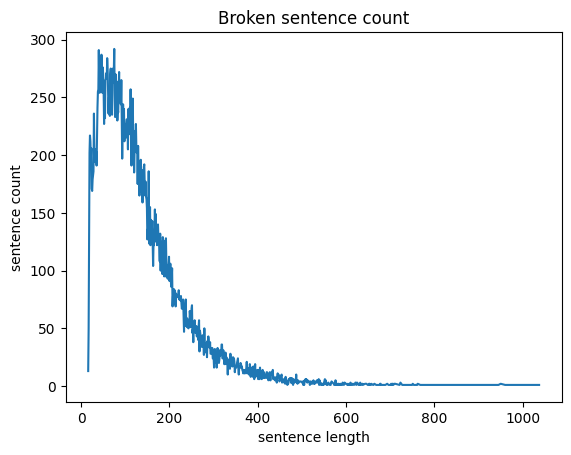

In [4]:
b = seaborn.lineplot(data=calculate_statistics(map(lambda item: item[0], my_dataset.broken_sentences)))
b.set_xlabel("sentence length")
b.set_ylabel("sentence count")
b.set_title("Broken sentence count")

In [ ]:
from train import RegressiveBufferGenerator, copy_unpadded_tokens_into_buffer
import torch
import functools
import torch
import functools

tokens = [
    [1, 2, 3, 4],
    [5, 6, 7, 8, 9],
    [10, 11]
]
x = torch.zeros(3, 5, dtype=torch.int32)
lengths = list(map(lambda i: len(i), tokens))
print("tokens", tokens)
# print("x before update\n",x)
copy_unpadded_tokens_into_buffer(tokens, x)
# print("x after update\n", x)
print("lengths:", lengths)
autoregressive_generator = RegressiveBufferGenerator(x, lengths)
print("count of generatable items", len(autoregressive_generator))
y = torch.zeros(5, x.shape[1], dtype=torch.int32)

for i in range(5):
    print(f"iter: {i}------------------------\n")
    copy_count = autoregressive_generator.generate_into(y, 5)
    print(f"copy count: {copy_count}")
    print(y)
    y.zero_()

tokens [[1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11]]
lengths: [4, 5, 2]
count of generatable items 11
iter: 0------------------------

copy count: 5
tensor([[1, 0, 0, 0, 0],
        [1, 2, 0, 0, 0],
        [1, 2, 3, 0, 0],
        [1, 2, 3, 4, 0],
        [5, 0, 0, 0, 0]], dtype=torch.int32)
iter: 1------------------------

copy count: 5
tensor([[ 5,  6,  0,  0,  0],
        [ 5,  6,  7,  0,  0],
        [ 5,  6,  7,  8,  0],
        [ 5,  6,  7,  8,  9],
        [10,  0,  0,  0,  0]], dtype=torch.int32)
iter: 2------------------------

copy count: 1
tensor([[10, 11,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
iter: 3------------------------

copy count: 0
tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)
iter: 4------------------------

copy count: 0
tensor([[0, 0, 0, 0, 0],
        [0, 